# Did the election negatively impact outdoor retail sales?
Using Google search term [trends](https://www.google.com/trends/) as a proxy for sales interest.

I downloaded 90 days of U.S. search trends for election-related and outdoor-retail-related shopping search terms this year (mid-August - mid-November 2016), as well as the same 90 day period during 2015. I found a significant negative correlation between the year-over-year differences in shopping searches and searches related to the election.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy.stats
import seaborn; seaborn.set()

%matplotlib inline

In [2]:
# 2016 data - 90 day search trends
filenames = glob.glob('google_trends_data/*US.csv')
filenames

['google_trends_data/Backcountrydotcom_onlineretailer_shopping_US.csv',
 'google_trends_data/jacket_garment_shopping_US.csv',
 'google_trends_data/Ski_sportequip_shopping_US.csv',
 'google_trends_data/trump_searchterm_allcategories_US.csv',
 'google_trends_data/USpresentialelection_allcategories_US.csv']

In [3]:
df = pd.read_csv(filenames[0], skiprows=1)
df.index = pd.to_datetime(df.Day)
df.drop('Day', axis=1, inplace=True)

for f in filenames[1:]:
    df_temp = pd.read_csv(f, skiprows=1)
    df[df_temp.columns[1]] = df_temp[df_temp.columns[1]].values

df.rename(columns={'Jacket: (United States)': 'Jacket',
                   'Ski: (United States)': 'Ski',
                   'US Presidential Election 2016: (United States)': 'Election',
                   'trump: (United States)': 'Trump'}, inplace=True)
df.head()

,Backcountry.com: (United States),Jacket,Ski,Trump,Election
Day,,,,,
2016-08-23,33,30,15,5,0
2016-08-24,27,30,18,4,0
2016-08-25,53,29,30,5,0
2016-08-26,35,29,22,4,0
2016-08-27,38,33,19,4,0


In [4]:
# 2015 data - 90 day search trends
filenames = glob.glob('google_trends_data/*2015.csv')
filenames

['google_trends_data/Backcountrydotcom_onlineretailer_shopping_US_2015.csv',
 'google_trends_data/jacket_garment_shopping_US_2015.csv',
 'google_trends_data/Ski_sportequip_shopping_US_2015.csv']

In [5]:
df_2015 = pd.read_csv(filenames[0], skiprows=1)
df_2015.index = pd.to_datetime(df_2015.Day)
df_2015.drop('Day', axis=1, inplace=True)

for f in filenames[1:]:
    df_temp = pd.read_csv(f, skiprows=1)
    df_2015[df_temp.columns[1]] = df_temp[df_temp.columns[1]].values

df_2015.rename(columns={'Jacket: (United States)': 'Jacket',
                        'Ski: (United States)': 'Ski'}, inplace=True)
df_2015.head()

,Backcountry.com: (United States),Jacket,Ski
Day,,,
2015-08-23,77,44,34
2015-08-24,71,34,20
2015-08-25,34,36,29
2015-08-26,60,35,23
2015-08-27,36,36,23


In [6]:
df['YOY_Jacket'] = df.Jacket.values - df_2015.Jacket.values
df['YOY_Ski'] = df.Ski.values - df_2015.Ski.values

df = df[['YOY_Jacket', 'YOY_Ski', 'Election', 'Trump']]

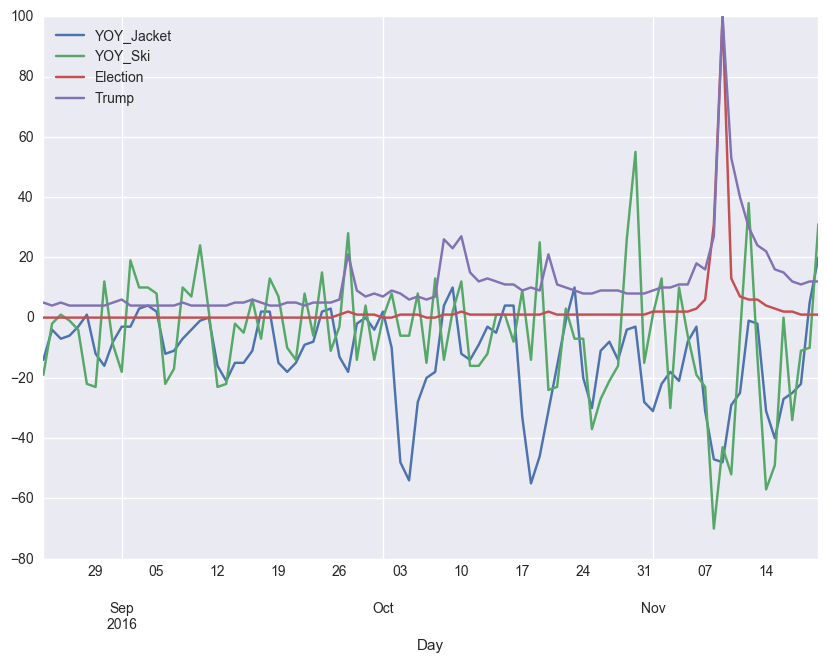

In [7]:
df.plot(figsize=(10,7))
plt.show()

In [8]:
df.Trump.corr(df.Election)  # positive correlation between election and trump searches

0.84742251632861043

In [9]:
df.YOY_Ski.corr(df.Election) # negative correlation between election and Y/Y ski searches

-0.32656800507083961

# Correlation summary
Election-related searches are significantly negatively correlated with YOY Ski and Jacket shopping searches.

In [10]:
for yoy_metric in ['Ski', 'Jacket']:

    print('\n{} YOY vs Election'.format(yoy_metric))
    corr, pval = scipy.stats.pearsonr(df.Election, df['YOY_'+yoy_metric])
    print('Correlation Coef: {}\nP-Value: {}'.format(round(corr,3), round(pval,4)))
    
    print('\n{} YOY vs Trump'.format(yoy_metric))
    corr, pval = scipy.stats.pearsonr(df.Trump, df['YOY_'+yoy_metric])
    print('Correlation Coef: {}\nP-Value: {}'.format(round(corr,3), round(pval,4)))    


Ski YOY vs Election
Correlation Coef: -0.327
P-Value: 0.0017

Ski YOY vs Trump
Correlation Coef: -0.32
P-Value: 0.0021

Jacket YOY vs Election
Correlation Coef: -0.345
P-Value: 0.0009

Jacket YOY vs Trump
Correlation Coef: -0.311
P-Value: 0.0029


## Disclaimer
Increased searches for election related terms are negatively correlated with shopping searches for skis and jackets, but its possible that some other variable is actually causing this apparent relation. Correlation doesn't imply causation. Not sure what that other variabe might be though. If you have an idea, or have other feedback on this analysis, I'd love to hear about it - please raise an issue!